# Chapter 3 - Exercise 6: Phân tích dữ liệu Movies

#### Dữ liệu được lấy từ MovieLens website. 
#### Download the Dataset
Theo link: 
* **Data Source:** MovieLens web site (filename: ml-latest-small.zip)
* **Location:** https://grouplens.org/datasets/movielens/latest/

##### Trong ml-latest-small.zip bao gồm 3 file CSV sau:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp* : Chứa dữ liệu về các xếp hạng của các bộ phim, mỗi dòng biểu thị một xếp hạng của một phim bởi một người dùng.
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp* : chứa thông tin về các Tag mà người dùng gắn vào cho phim, mỗi dòng biểu thị cho 1 tag của một người dùng cho một phim 
* **movies.csv :** *movieId*, *title*, *genres* : chứa thông tin về các bộ phim, mỗi dòng biểu thị thông tin của 1 bộ phim <br>

### Part 1: Đọc dữ liệu & Data Structures

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Câu 1: Đọc file movies.csv => đưa dữ liệu vào movies
movies = pd.read_csv('movies_data/movies.csv', delimiter = ',')
# Cho biết kiểu dữ liệu (type) của movies
movies.dtypes

# Cho biết kích thước (shape) của movies
movies.shape
# Hiển thị 5 dòng dữ liệu đầu tiên (head) của movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của movies
movies.tail()

,movieId,title,genres
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy
9124,164979,"Women of '69, Unboxed",Documentary


In [6]:
# Cho biết kiểu dữ liệu (dtype) của các cột của movies
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [7]:
# Xem thông tin (info) của movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9125 non-null   int64 
 1   title    9125 non-null   object
 2   genres   9124 non-null   object
dtypes: int64(1), object(2)
memory usage: 214.0+ KB


In [8]:
# Câu 2: Đọc file tags.csv => đưa dữ liệu vào tags
tags = pd.read_csv('movies_data/tags.csv', delimiter =',')
# Cho biết kiểu dữ liệu (type) của tags
tags.dtypes
# Cho biết kích thưc (shape) của tags
tags.shape
# Hiển thị 5 dòng đầu tiên (head) của tags
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1.138538e+09
1,15,1955,dentist,1.193435e+09
2,15,7478,Cambodia,1.170561e+09
3,15,32892,Russian,1.170626e+09
4,15,34162,forgettable,1.141392e+09


In [9]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của tags
tags.tail()

,userId,movieId,tag,timestamp
1291,660,135518,meaning of life,1.436681e+09
1292,660,135518,philosophical,1.436681e+09
1293,660,135518,sci-fi,1.436681e+09
1294,663,260,action,1.438398e+09
1295,663,260,Syfy,1.438398e+09


In [10]:
# Cho biết kiểu dữ liệu (dtype) của các cột của tags
tags.dtypes

userId         int64
movieId        int64
tag           object
timestamp    float64
dtype: object

In [11]:
# Xem thông tin (info) của tags
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     1296 non-null   int64  
 1   movieId    1296 non-null   int64  
 2   tag        1296 non-null   object 
 3   timestamp  1295 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 40.6+ KB


In [12]:
# Câu 3: Đọc file ratings.csv => đưa dữ liệu vào ratings
ratings = pd.read_csv('movies_data/ratings.csv',delimiter = ',')
# Cho biết kiểu dữ liệu (type) của ratings
ratings.shape

# Cho biết kích thước của ratings

# Hiển thị 5 dòng đầu tiên (head) của ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [13]:
# Hiển thị 5 dòng dữ liệu cuối (tail) của ratings
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [14]:
# Cho biết kiểu dữ liệu (dtype) của các cột của ratings
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [15]:
# Xem thông tin (info) của ratings
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Part 2: Xử lý dữ liệu bị thiếu/ không hợp lệ

In [16]:
# Câu 1: Cho biết trong movies có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
movies.isnull().sum()

movieId    0
title      0
genres     1
dtype: int64

In [17]:
# Loại bỏ dòng có dữ liệu null
movies = movies.dropna(axis = 0)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [18]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [19]:
# Câu 2: Cho biết trong ratings có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null.
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Trong ratings không có giá trị NULL.

In [20]:
# Câu 3: Cho biết trong tags có dữ liệu null hay không? Nếu có loại bỏ dòng có dữ liệu null. 
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    1
dtype: int64

In [21]:
tags = tags.dropna(axis = 0)
tags

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1.138538e+09
1,15,1955,dentist,1.193435e+09
2,15,7478,Cambodia,1.170561e+09
3,15,32892,Russian,1.170626e+09
4,15,34162,forgettable,1.141392e+09
...,...,...,...,...
1291,660,135518,meaning of life,1.436681e+09
1292,660,135518,philosophical,1.436681e+09
1293,660,135518,sci-fi,1.436681e+09
1294,663,260,action,1.438398e+09


In [22]:
# Loại bỏ dòng có dữ liệu null
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [23]:
# Câu 4: Kiểm tra xem có dữ liệu rating nào không hợp lệ hay không ('rating' > 5 hoặc 'rating' < 0) ? (0-5)
# Nếu có, hãy thay bằng giá trị xuất hiện nhiều nhất
mode_rating = ratings[(ratings['rating'] >= 0) & (ratings['rating'] <= 5)]['rating'].mode()[0]
ratings[(ratings['rating'] > 5) | (ratings['rating'] <0)] = mode_rating
ratings[(ratings['rating'] > 5) | (ratings['rating'] <0)]

,userId,movieId,rating,timestamp


In [24]:
# Thay bằng giá trị xuất hiện nhiều nhất


### Part 3: Gộp DataFrame

In [25]:
# Câu 1: Tạo movies_tags bằng cách gộp dữ liệu của movies và tags theo cột chung là 'moviedId'.
movies_tags = pd.merge(movies, tags, on = 'movieId', how = 'inner')
# Hiển thị 5 dòng đầu của movies_tags
movies_tags.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,501,Pixar,1.292956e+09
1,5,Father of the Bride Part II (1995),Comedy,431,steve martin,1.140455e+09
2,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,biblical,1.444535e+09
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,crime,1.444535e+09
4,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,364,dark,1.444535e+09


In [26]:
# Câu 2: Tạo movies_ratings bằng cách gộp dữ liệu của movies và ratings theo cột chung là 'moviedId'.
movies_ratings = pd.merge(movies, ratings, on = 'movieId', how = 'inner')
# Hiển thị 5 dòng đầu của movies_ratings
movies_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


### Part 4: Lọc dữ liệu theo yêu cầu

In [27]:
# Câu 1: Tạo dataframe tag_counts cho biết với mỗi tag là có bao nhiêu film chứa giá trị 'tag' đó 
# gợi ý: dùng tags['tag'].value_counts() 
tag_counts = pd.DataFrame(tags['tag'].value_counts()).reset_index()
tag_counts.columns = ['tag', 'count']
# Hiển thị 10 dòng đầu của tag_counts
tag_counts.head()


,tag,count
0,getdvd,33
1,Ei muista,29
2,tivo,26
3,toplist07,26
4,toplist11,20


In [28]:
# Câu 2: Tạo is_highly_rated theo điều kiện: có 'rating' >= 4.0 của dataframe ratings 

# Hiển thị 5 dòng dữ liệu đầu của is_highly_rated

is_highly_rated = ratings[ratings['rating']>=4.0]
is_highly_rated.head()

,userId,movieId,rating,timestamp
4,1,1172,4.0,1260759205
12,1,1953,4.0,1260759191
13,1,2105,4.0,1260759139
20,2,10,4.0,835355493
21,2,17,5.0,835355681


In [29]:
# Liệt kê các phim thỏa is_highly_rated
highly_rated_movies = pd.merge(is_highly_rated,movies[['movieId','title']], on = 'movieId', how = 'left')
highly_rated_movies

,userId,movieId,rating,timestamp,title
0,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989)
1,1,1953,4.0,1260759191,"French Connection, The (1971)"
2,1,2105,4.0,1260759139,Tron (1982)
3,2,10,4.0,835355493,GoldenEye (1995)
4,2,17,5.0,835355681,Sense and Sensibility (1995)
...,...,...,...,...,...
51563,671,5989,4.0,1064890625,Catch Me If You Can (2002)
51564,671,5991,4.5,1064245387,Chicago (2002)
51565,671,5995,4.0,1066793014,"Pianist, The (2002)"
51566,671,6269,4.0,1065149201,Stevie (2002)


In [30]:
# Câu 3: Tạo is_animation theo điều kiện trong cột genres của movies có chứa chuỗi 'Animation'
is_animation = movies[movies['genres'].str.contains('Animation',na = 'False')]
# Hiển thị 5 dòng dữ liệu đầu của is_animation
is_animation.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_35380\992981734.py:2: FutureWarning: Allowing a non-bool 'na' in obj.str.contains is deprecated and will raise in a future version.
  is_animation = movies[movies['genres'].str.contains('Animation',na = 'False')]


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
46,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
211,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
216,244,Gumby: The Movie (1995),Animation|Children


In [31]:
# Liệt kê các phim thỏa is_animation
is_animation['title']

0                            Toy Story (1995)
12                               Balto (1995)
46                          Pocahontas (1995)
211                     Goofy Movie, A (1995)
216                   Gumby: The Movie (1995)
                        ...                  
9070                          Zootopia (2016)
9079    Ice Age: The Great Egg-Scapade (2016)
9085                      Finding Dory (2016)
9108                             Piper (2016)
9114     Kingsglaive: Final Fantasy XV (2016)
Name: title, Length: 447, dtype: object

In [32]:
# Câu 5: Thêm cột mới cho movies có tên là 'year' với year được lấy ra từ cột 'title'
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
# Hiển thị 5 dòng dữ liệu đầu của movies
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


### Part 5: Thống kê dữ liệu

In [33]:
# Câu 1: Thực hiện thống kê chung dữ liệu ratings
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011330,12548.660904,3.543608,1.129631e+09
std,195.163803,26369.200592,1.058064,1.917168e+08
min,1.000000,1.000000,0.500000,4.000000e+00
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [34]:
# Câu 2: Thống kê đếm số lượng phim theo ‘rating’ (Count of films). Xem kết quả. 
ratings['rating'].value_counts().sort_index()
# Xem kết quả


rating
0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: count, dtype: int64

In [35]:
# Câu 3: Đếm số lượng rating (Total ratings) theo phim, và lưu vào biến 'movie_count'
ratings['movieId'].value_counts().sort_index()
# Hiển thị 5 dòng dữ liệu đầu của total_ratings
ratings['movieId'].value_counts().sort_index().head()

movieId
1    247
2    107
3     59
4     14
5     56
Name: count, dtype: int64

In [36]:
# Câu 4: Tính rating trung bình (Average ratings) theo mỗi phim, và lưu vào biến avg_ratings
ratings.groupby('movieId')['rating'].mean()
# Hiển thị 5 dòng dữ liệu đầu của avg_ratings
ratings.groupby('movieId')['rating'].mean().head()

movieId
1    3.872470
2    3.401869
3    3.161017
4    2.500000
5    3.267857
Name: rating, dtype: float64

In [37]:
# Câu 5: Hiển thị rating trung bình của các phim là ‘Comedy’, 
# chỉ in ra 5 dòng dữ liệu đầu của dataframe kết quả
is_comedy = movies[movies['genres'].str.contains('Comedy',na = 'False')]
is_comedy = pd.merge(is_comedy[['movieId','title']], ratings, on='movieId')
is_comedy.groupby('title')['rating'].mean().reset_index()

C:\Users\ACER\AppData\Local\Temp\ipykernel_35380\579052788.py:3: FutureWarning: Allowing a non-bool 'na' in obj.str.contains is deprecated and will raise in a future version.
  is_comedy = movies[movies['genres'].str.contains('Comedy',na = 'False')]


,title,rating
0,'Hellboy': The Seeds of Creation (2004),2.000000
1,"'burbs, The (1989)",3.052632
2,(500) Days of Summer (2009),3.755556
3,*batteries not included (1987),3.142857
4,...And God Spoke (1993),1.000000
...,...,...
3302,Zoom (2006),2.500000
3303,Zootopia (2016),4.000000
3304,"Zorro, the Gay Blade (1981)",4.750000
3305,¡Three Amigos! (1986),3.258065


In [40]:
# Câu 7: Hiển thị rating trung bình của các phim là ‘Comedy’ và có 'rating' >= 4, 
# chỉ in ra 5 dòng dữ liệu cuối của dataframe kết quả.
is_comedy = movies[movies['genres'].str.contains('Comedy',na = 'False')]
is_comedy = pd.merge(is_comedy[['movieId','title']], ratings, on='movieId')
is_comedy_high = is_comedy[is_comedy['rating'] >=4]
is_comedy_high.groupby('title')['rating'].mean().reset_index()

C:\Users\ACER\AppData\Local\Temp\ipykernel_35380\728564698.py:3: FutureWarning: Allowing a non-bool 'na' in obj.str.contains is deprecated and will raise in a future version.
  is_comedy = movies[movies['genres'].str.contains('Comedy',na = 'False')]


,title,rating
0,"'burbs, The (1989)",4.100000
1,(500) Days of Summer (2009),4.321429
2,*batteries not included (1987),4.000000
3,10 Attitudes (2001),5.000000
4,10 Things I Hate About You (1999),4.423077
...,...,...
2166,Zoolander (2001),4.263158
2167,Zootopia (2016),4.500000
2168,"Zorro, the Gay Blade (1981)",4.750000
2169,¡Three Amigos! (1986),4.181818


In [51]:
# Câu 8: Tính trung bình rating theo year, và lưu vào biến yearly_average
yearly_average = pd.merge (movies, ratings, on = 'movieId')
yearly_average = yearly_average.groupby('year')['rating'].mean()

# Cho biết shape của yearly_average
yearly_average.shape
# Hiển thị 5 dòng dữ liệu đầu của yearly_average
yearly_average.head()

year
1902    4.333333
1915    3.000000
1916    3.500000
1917    4.250000
1918    4.250000
Name: rating, dtype: float64

In [78]:
# Câu 9: Sắp xếp tăng dần yearly_average
yearly_average_asc = yearly_average.sort_values()
# Hiển thị 20 dòng dữ liệu đầu của yearly_average_asc
yearly_average_asc.head(20)

year
1915    3.000000
1919    3.000000
2016    3.217742
2000    3.355945
2013    3.356973
1929    3.361111
2015    3.371028
2011    3.401188
2012    3.404153
1997    3.415764
2014    3.418546
1996    3.426600
2003    3.444777
2005    3.448434
1990    3.449169
2002    3.456472
2001    3.460052
1992    3.466754
1999    3.471692
1995    3.472197
Name: rating, dtype: float64

### Part 6: Parsing Timestamps

In [55]:
# Câu 1: Tạo cột parsed_time trong tags bằng cách đổi thời gian sang định dạng DateTime 
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
# Cho biết kiểu dữ liệu của cột parsed_time
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [56]:
# Hiển thị 5 dòng dữ liệu đầu của tags
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,15,339,sandra 'boring' bullock,1.138538e+09,2006-01-29 12:29:30
1,15,1955,dentist,1.193435e+09,2007-10-26 21:44:21
2,15,7478,Cambodia,1.170561e+09,2007-02-04 03:49:57
3,15,32892,Russian,1.170626e+09,2007-02-04 21:59:26
4,15,34162,forgettable,1.141392e+09,2006-03-03 13:16:05


In [58]:
# Câu 2: Tạo selected_rows chứa các dòng có tags['parsed_time'] > '2015-02-01'. 
selected_rows = tags[tags['parsed_time'] > '2015-02-01']
selected_rows.head()

,userId,movieId,tag,timestamp,parsed_time
8,15,100365,activist,1.425876e+09,2015-03-09 04:43:40
9,15,100365,documentary,1.425876e+09,2015-03-09 04:43:40
10,15,100365,uganda,1.425876e+09,2015-03-09 04:43:40
15,73,107999,action,1.430799e+09,2015-05-05 04:13:04
16,73,107999,anime,1.430799e+09,2015-05-05 04:13:04


In [64]:
# Câu 3: Sắp xếp dữ liệu tags tăng dần theo cột parsed_time
# Hiển thị 10 dòng dữ liệu đầu của tags
tags.sort_values(by = 'parsed_time').head(10)

,userId,movieId,tag,timestamp,parsed_time
338,353,35836,dumb,1.137217e+09,2006-01-14 05:44:00
0,15,339,sandra 'boring' bullock,1.138538e+09,2006-01-29 12:29:30
232,294,36401,fairy tales,1.138983e+09,2006-02-03 16:11:04
229,294,6754,vampire,1.138983e+09,2006-02-03 16:17:49
333,353,4721,As historicaly correct as Germany winning WW2,1.140389e+09,2006-02-19 22:44:16
334,353,4721,but still a fun movie.,1.140389e+09,2006-02-19 22:44:16
335,353,7376,"The Rocks ""finest"" work need I say more?",1.140390e+09,2006-02-19 22:51:51
336,353,31221,Try not to mistake this for an episode of Alias,1.140390e+09,2006-02-19 22:53:15
230,294,8865,1940's feel,1.140396e+09,2006-02-20 00:38:50
231,294,8865,unique look,1.140396e+09,2006-02-20 00:38:50


### Part 7: Trực quan hóa dữ liệu

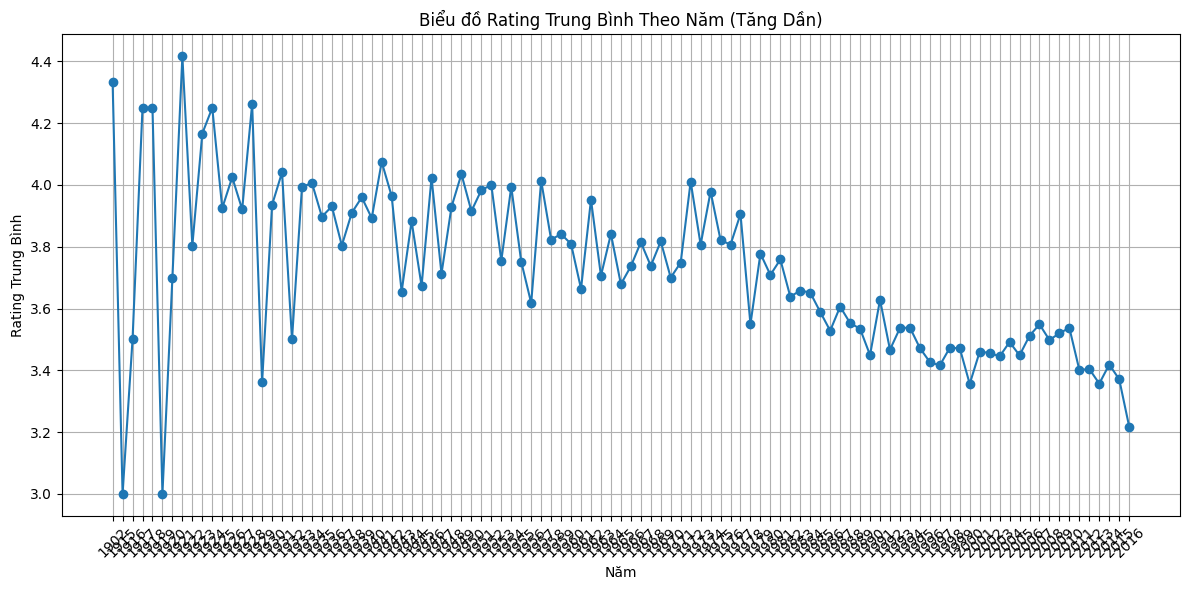

In [76]:
# Câu 1: Dựa vào Câu 9 - Part 5, Vẽ biểu đồ plot() cho yearly_average sau khi sắp tăng dần
import matplotlib.pyplot as plt
yearly_average_asc = yearly_average.sort_index()
plt.figure(figsize=(12,6))
plt.plot(yearly_average_asc.index, yearly_average_asc.values, marker='o', linestyle = '-')
plt.title('Biểu đồ Rating Trung Bình Theo Năm (Tăng Dần)')
plt.xlabel('Năm')
plt.ylabel('Rating Trung Bình')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Quan sát biểu đồ trên, nhận xét:
 - Những năm nào có rating đặc biệt cao/thấp?

In [ ]:
Năm 1915,1919 rating trung bình thấp nhất ở mức 3.0 trong khi Năm 1921 lại có rating trung bình đặc biệt cao (4.44)